## Agenda


- Confidence intervals

    - Standard error
    - Confidence factors
    - Margin of Error  
  
- Constructing a confidence intervals for the bike share trip durations

- Z-scores for the normal distributions



## Confidence Intervals


A point estimate `x_bar`, of the mean, provides a single plausible value for a parameter. However, as we have seen, a point estimate is rarely perfect; usually there is some error in the estimate. That is why we have suggested using the standard error as a measure of its variability.

Instead of that, a next logical step would be to provide a __plausible range of values__ for the parameter. A plausible range of values for the sample parameter is called a __confidence interval.__

<img src = "./img/margin_of_error.png" width = 450 />

Point estimate +/- margin of error

**KEY POINT** : Our level of confidence that if we obtained a sample of equal size, our sample interval would contain the population mean.

 - This implies that there is an element of chance whether this interval will contain the true mean or not. In fact, when we calculate 95% confidence intervals, we should expect for every 20 samples and 20 confidence intervals created from these samples, on of them might miss the true parameter.

Let's understand this better using a [visual display](https://shiny.rit.albany.edu/stat/confidence/).

### Z-scores

Confidence factor is found through z-score, measure of variability is found via CLT

In [18]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [19]:
mu =90

sigma = 5

num_std = 3

In [36]:
x_bar = 82

In [37]:
z_score = (x_bar - mu)/sigma

In [38]:
z_score

-1.6

In [22]:
norm.pdf(0)

0.3989422804014327

In [23]:
x = np.linspace(mu - num_std*sigma, mu + num_std*sigma, 100)
y = norm.pdf(x , loc= mu, scale = sigma)

In [24]:
norm.pdf(z_score)

0.07895015830089415

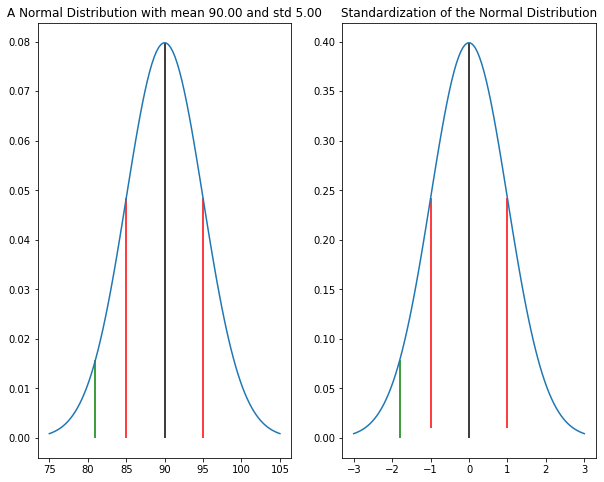

In [26]:

plt.figure(figsize = (10,8))
plt.subplot(1,2,1).plot(x,y)
plt.vlines(x =mu, ymin = 0, ymax = norm.pdf(mu, loc = mu, scale = sigma) )

plt.vlines(x = [mu - sigma, mu + sigma], ymin = [0,0 ], 
           ymax = [norm.pdf(mu-sigma, loc = mu, scale = sigma),norm.pdf(mu+sigma, loc = mu, scale = sigma)], color = 'red')

plt.vlines(x = x_bar, ymin = 0, ymax = norm.pdf(x_bar, loc = mu, scale = sigma), color = 'green')
plt.title("A Normal Distribution with mean %.2f and std %.2f"%(mu, sigma))
x_standard = np.linspace(-num_std, num_std, 100)
y_standard = norm.pdf(x_standard)

plt.subplot(1,2,2).plot(x_standard,y_standard)
plt.vlines(x =0, ymin = 0, ymax = norm.pdf(0, loc = 0, scale = 1) )

plt.vlines(x = [-1,1], ymin = [0.01, 0.01], 
           ymax = [norm.pdf(-1),norm.pdf(1)], color = 'red')

plt.vlines(x = z_score, ymin = 0, ymax = norm.pdf(z_score), color = 'green')
plt.title("Standardization of the Normal Distribution")
plt.show()

### An Example

Let's try to create a %95 confidence interval for the average Capital Bike Share trips durations.

For this problem we can assume that we know the population standard deviation $\sigma = 17$. Note that $\mu$ is not known and we are trying to estimate it.

[For more info about the data](https://www.capitalbikeshare.com/system-data)

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('data/sampled_bikeshare.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)

In [40]:
print(df.shape)
df.head()


(1000, 9)


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,368,2019-04-22 18:16:13,2019-04-22 18:22:22,31253,19th & K St NW,31278,18th & R St NW,W21152,Member
1,1512,2019-04-06 17:05:11,2019-04-06 17:30:23,31610,Eastern Market / 7th & North Carolina Ave SE,31223,Convention Center / 7th & M St NW,W00865,Member
2,378,2019-04-10 09:38:34,2019-04-10 09:44:53,31500,4th & W St NE,31603,1st & M St NE,W21437,Member
3,863,2019-04-29 21:14:20,2019-04-29 21:28:43,31404,9th & Upshur St NW,31124,14th & Irving St NW,W23445,Member
4,198,2019-04-01 10:48:08,2019-04-01 10:51:27,31104,Adams Mill & Columbia Rd NW,31110,20th St & Florida Ave NW,W20212,Member


In [45]:
## convert seconds to mins
trip_durations = df['Duration']/60
trip_durations.describe()

count    1000.000000
mean       20.776117
std        51.452967
min         1.266667
25%         6.845833
50%        12.300000
75%        21.433333
max      1405.366667
Name: Duration, dtype: float64

Note that there are some outliers. Let's take a closer look at them.

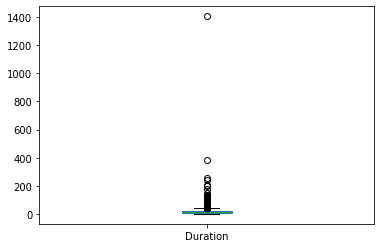

In [46]:
trip_durations.plot(kind = 'box')

In [47]:

## Considering only the trips less than 2 hours
two_hours_trips = trip_durations[trip_durations < 120]

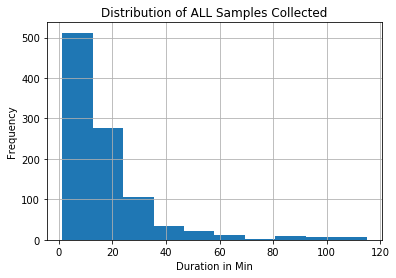

In [48]:
two_hours_trips.hist()
plt.title("Distribution of ALL Samples Collected")
plt.xlabel("Duration in Min")
plt.ylabel("Frequency")
plt.show()

Note that distribution is definitely not normally distributed.

In [61]:
## Find the point estimator for the population mean:

x_bar = two_hours_trips.mean()

print("In our sample the average trip length is: %.2f"%x_bar)

In our sample the average trip length is: 17.11


In [62]:
## We can also calculate point estimators for the median and variance and std
## recall that the sample statistics for standard deviation is denoted with "s"
s = two_hours_trips.std()
print("Sample standard deviation is: %.2f"%s)

Sample standard deviation is: 17.09


### Basic Principles in the Construction of Confidence Intervals

 - Our point estimate is the most plausible value of the parameter, so it makes sense to build the confidence interval around the point estimate.

 - The plausability of a range of values can be defined from the sampling distribution of the estimate.

### Central Limit Theorem Recap:


Given a population with a mean $\mu$ and a variance $\sigma^{2}$, the sampling distribution of the mean approaches a normal distribution with a mean of $\mu$ and standard deviation of $\sqrt{\frac{\sigma^{2}}{n}}$ as n, the sample size, increases.


__Note__

$\sqrt{\frac{\sigma^{2}}{n}}$ will be called the standard error of the mean. We usually denote it with `SE`. Note that standard error of the mean is actually standard deviation of the sampling distribution of the mean.

#### Central Limit Theorem with Respect to Different Population Distributions

In [64]:
from scipy.stats import uniform

In [65]:
from scipy.stats import expon

In [66]:
from scipy.stats import poisson

In [67]:
import math

In [80]:
def central_limit_plot(dist_name, population_size, sample_size, num_samples):
    """
    This function plots the original population distribution and
    the sampling distribution of the mean derived from this population
    """
    if dist_name == "uniform":
        distribution =uniform.rvs(size = population_size)
        mu, sigma = uniform.stats(moments = 'mv')
        sampling_mean_distribution = []
        for i in range(num_samples):
            sample = uniform.rvs(size = sample_size)
            sampling_mean_distribution.append(sample.mean())
    if dist_name == "exponential":
        distribution =expon.rvs(size = population_size)
        mu, sigma = expon.stats(moments = 'mv')
        sampling_mean_distribution = []
        for i in range(num_samples):
            sample = expon.rvs(size = sample_size)
            sampling_mean_distribution.append(sample.mean())
    if dist_name == "poisson":
        distribution =poisson.rvs(mu =math.e, size = population_size)
        mu, sigma = poisson.stats(mu = math.e, moments = 'mv')
        sampling_mean_distribution = []
        for i in range(num_samples):
            sample = poisson.rvs(mu = math.e, size = sample_size)
            sampling_mean_distribution.append(sample.mean())
    sampling_mu = np.mean(sampling_mean_distribution)
    empirical_standard_error = np.std(sampling_mean_distribution)
    se = np.sqrt(sigma/sample_size)
    
    plt.figure(figsize = (10, 8))
    plt.subplot(1,2,1).hist(distribution)
    plt.title("%s Distribution: $\mu$ =%.2f std: %.2f"%(dist_name,mu,sigma))
    plt.subplot(1,2,2).hist(sampling_mean_distribution)
    plt.axvline(x = np.mean(sampling_mean_distribution), 
                color = 'yellow',
                label=  "$\mu$= %.2f"%sampling_mu)
    plt.axvline(x = mu - empirical_standard_error, color = 'red', linestyle = "--", label = "Emprical SE: %.2f"%empirical_standard_error)
    plt.axvline(x = mu + empirical_standard_error, color = 'red', linestyle = "--", label = "SE: %.2f"%se)
    plt.title("Sampling distribution of the mean")
    plt.legend()
    plt.show()

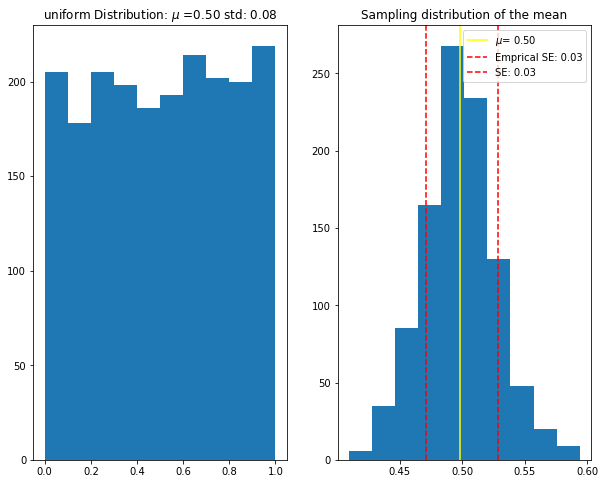

In [81]:
central_limit_plot(dist_name = "uniform", population_size= 2000, sample_size = 100, num_samples= 1000)

Now we can easily construct a confidence interval for mean trip durations:

In [70]:
x_bar = two_hours_trips.mean()

## Let's find sample size and record it as n

n= len(two_hours_trips)

## Recall that  sigma is known and 17

sigma = 17

## Standard Error:

se = np.sqrt(sigma**2/n)

print("Standard Error is %.2f"%se)

Standard Error is 0.54


In [71]:
## Confidence interval for the mean

# CI = (x_bar - 1.96*se, x_bar + 1.96*se)


CI

(16.048353442670418, 18.171680398277132)

We have 1.96 because that will be the location corresponding to a probability of 95%.  

Going the other way:

In [84]:
1-2*norm.cdf(-1.96)

0.9500042097035591

In [89]:
norm.ppf #"Point Percentile Function"

print(norm.ppf(.025))

print(norm.ppf((1-.95)/2))

norm.ppf(0.001)

-1.9599639845400545
-1.959963984540054


-3.090232306167813

so then in general you can do \[x_bar-ppf((1-confidence_factor)/2)\*se, x_bar+ppf((1-confidence_factor)/2)*se\]

In [ ]:
#Norm.sf(x) is 1-norm.cdf(x)

In [90]:
[norm.sf(k)+norm.cdf(k) for k in range(-10,10)]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
## Population mean (mu) is 17.32